<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Introduction to Data Science
    <div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.0 - Exploratory data analysis
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../data/processed.csv')
df

,Name,Released year,Genre,Director,Runtime (h),Score,Status,Language,Budget ($),Revenue ($)
0,Fast X,2023,"'Action', 'Crime', 'Thriller'",Dan Mazeau,2.37,72.0,Released,English,340000000.0,704709660.0
1,Trolls Band Together,2023,"'Animation', 'Family', 'Music', 'Fantasy', 'Co...",Thomas Dam,1.53,72.0,Released,English,95000000.0,173800000.0
2,Robot Apocalypse,2021,"'Science Fiction', 'Action'",Marcus Friedlander,1.45,21.0,Released,English,NaN,NaN
3,Five Nights at Freddy's,2023,"'Horror', 'Mystery'",Emma Tammi,1.83,78.0,Released,English,20000000.0,286700000.0
4,Oppenheimer,2023,"'Drama', 'History'",Christopher Nolan,3.02,81.0,Released,English,100000000.0,951000000.0
...,...,...,...,...,...,...,...,...,...,...
4995,Secret in Their Eyes,2015,"'Thriller', 'Mystery', 'Drama', 'Crime'",Billy Ray,1.85,64.0,Released,English,19500000.0,34854990.0
4996,The Vatican Tapes,2015,"'Thriller', 'Horror'",Mark Neveldine,1.52,53.0,Released,English,13000000.0,1784763.0
4997,Song to Song,2017,"'Romance', 'Drama', 'Music'",Terrence Malick,2.15,55.0,Released,English,10000000.0,1710528.0
4998,Divine Intervention,2023,'Comedy',Pedro Pablo Ibarra,1.67,82.0,Released,Spanish; Castilian,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           5000 non-null   object 
 1   Released year  5000 non-null   int64  
 2   Genre          4994 non-null   object 
 3   Director       4995 non-null   object 
 4   Runtime (h)    4729 non-null   float64
 5   Score          5000 non-null   float64
 6   Status         5000 non-null   object 
 7   Language       5000 non-null   object 
 8   Budget ($)     3275 non-null   float64
 9   Revenue ($)    3385 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 390.8+ KB


### Question:
Caculate the ratio between film released of 20 year recently and film that have profit, then come to the conclusion

In [4]:
df['Profitable'] = df['Revenue ($)'] > df['Budget ($)']

# Filter the DataFrame to include only the 20 most recent years
recent_years = df[df['Status'] == 'Released']['Released year'].max() - 19
df_recent = df[df['Released year'] >= recent_years]

# Group by 'Released year' and calculate the number of total and profitable films for each year
film_counts_by_year = df_recent.groupby('Released year')['Profitable'].agg(['sum', 'count'])
film_counts_by_year.columns = ['Profitable Films', 'Total Films']

# Calculate the ratio of profitable films to total films for each year
film_counts_by_year['Profit Ratio'] = film_counts_by_year['Profitable Films'] / film_counts_by_year['Total Films']

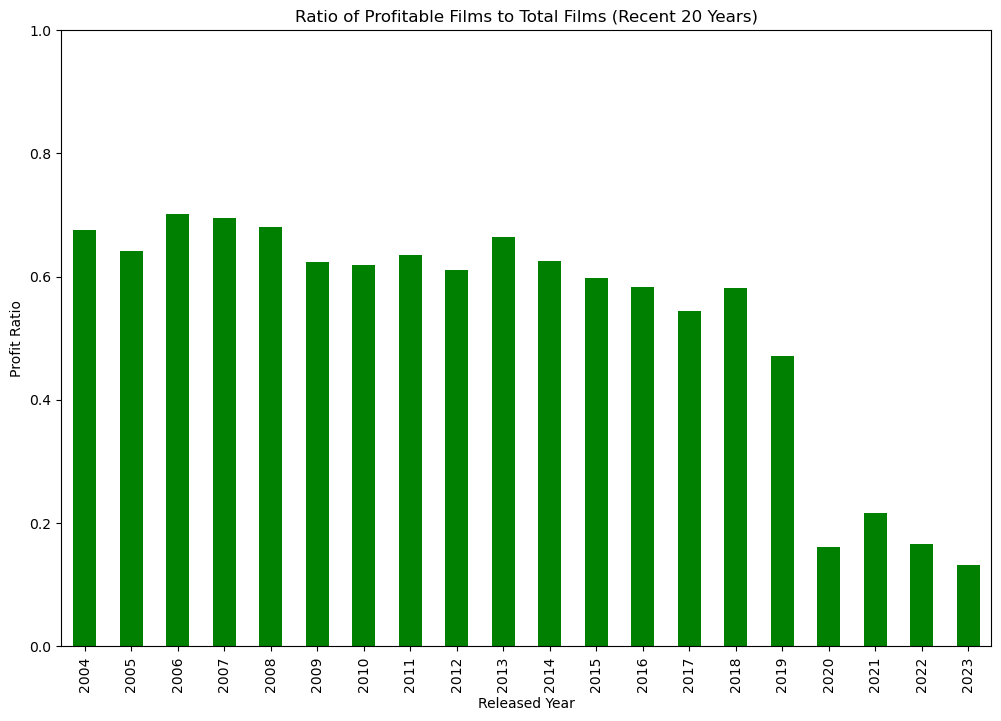

In [5]:
# Plotting the ratio
plt.figure(figsize=(12, 8))
film_counts_by_year['Profit Ratio'][:-1].plot(kind='bar', color='green', ylim=(0, 1))
plt.title('Ratio of Profitable Films to Total Films (Recent 20 Years)')
plt.xlabel('Released Year')
plt.ylabel('Profit Ratio')
plt.show()

### Conclusion
From the visualization, we can see that it tend to downward recent years, especially from 2020 to 2023.